#### 1. To install pandas-datareader package, use the following command from the command prompt window (terminal window on Mac): 
conda install pandas-datareader
#### 2. Download the adjusted close price for AAPL, INTC, EBAY and AMZN for the last 60 months.

In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd
start = datetime.datetime(2013, 2, 28)
end = datetime.datetime(2018, 2, 28)
AAPL = web.DataReader('AAPL', 'yahoo', start, end)
INTC = web.DataReader('INTC', 'yahoo', start, end)
EBAY = web.DataReader('EBAY', 'yahoo', start, end)
AMZN = web.DataReader('AMZN', 'yahoo', start, end)

In [2]:
import matplotlib.pyplot as plt   # Import matplotlib

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
pd.options.display.max_rows = 10
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
plt.figure(figsize=(8,5))

Populating the interactive namespace from numpy and matplotlib


<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [3]:
### Combine all adj closing price for all four stocks
stock_name = ['AAPL','INTC','EBAY','AMZN']
stock = [AAPL,INTC,EBAY,AMZN]
list1=[]
for i in range(4):
    AdjClose = stock[i]['Adj Close']
    AdjClose.name = stock_name[i] 
    list1.append(AdjClose)
df = pd.concat(list1, axis=1)
df

,AAPL,INTC,EBAY,AMZN
Date,,,,
2013-02-28,46.861313,17.537090,23.026094,264.269989
2013-03-01,45.700935,17.663073,23.106060,265.739990
2013-03-04,44.594696,17.864651,23.350168,273.109985
2013-03-05,45.772064,18.066231,23.257576,275.589996
2013-03-06,45.190281,18.267801,22.546297,273.790009
...,...,...,...,...
2018-02-23,173.609100,46.874256,43.680000,1500.000000
2018-02-26,177.041733,48.229519,43.830002,1521.949951
2018-02-27,176.467987,49.015175,43.150002,1511.979980


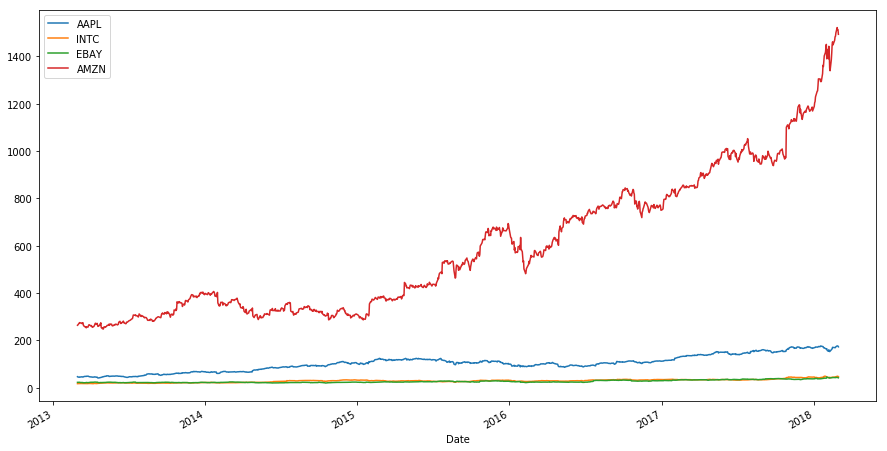

In [4]:
# Exam all stock price
df.plot(figsize=(15,8))

#### 3. Select the adjusted monthend close price for each of the stocks.

In [5]:
df = df.resample('M', convention='end').last()
df

,AAPL,INTC,EBAY,AMZN
Date,,,,
2013-02-28,46.861313,17.537090,23.026094,264.269989
2013-03-31,46.995083,18.343391,22.819866,266.489990
2013-04-30,47.007820,20.115578,22.049664,253.809998
2013-05-31,50.049389,20.584850,22.769360,269.200012
2013-06-30,44.128880,20.542459,21.767677,277.690002
...,...,...,...,...
2017-11-30,169.308151,43.739334,34.669998,1176.750000
2017-12-31,166.726913,45.026932,37.740002,1169.469971
2018-01-31,164.953522,46.958332,40.580002,1450.890015


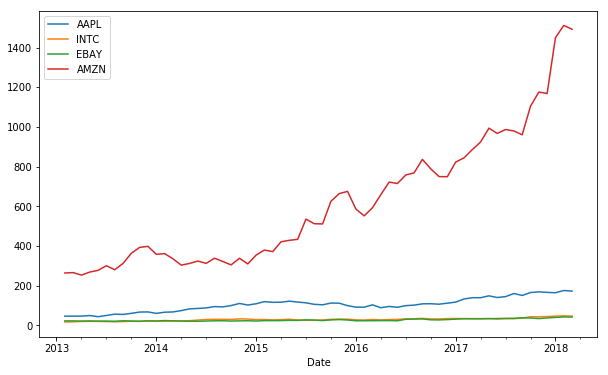

In [6]:
df.plot(figsize=(10,6)) # Plot the adj closing price of AAPL

#### 4. Use pandas autocorrelation_plot() function to plot the autocorrelation of the monthend close prices of each of the stocks.  Are they autocorrelated?  Why or why not?

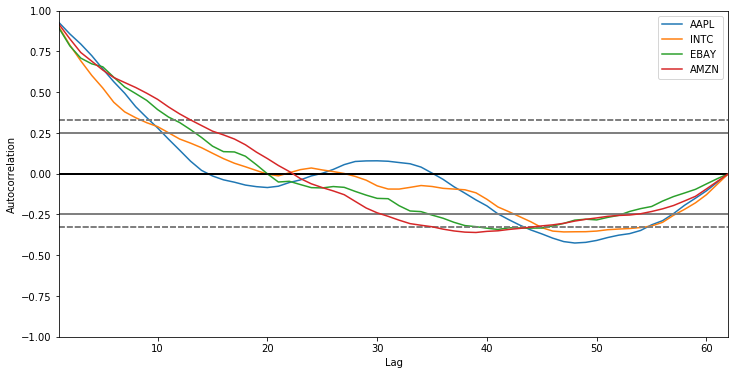

In [7]:
plt.figure(figsize=(12,6))
for i in df.columns:
    pd.plotting.autocorrelation_plot(df[i],label=i)

Based on the autocorrelation plot, it shows that the time series for four stocks is not random, but rather has a high to moderate degree of autocorrelation between adjacent and near-adjacent observations (from 1 week to about 10 weeks,  autocorrelation values are outside of the 95%-confidence interval). 
Stocks are not autocorrelated for lags more than 10 weeks. 

#### 5. Calculate the monthly return over the period for each stock using the “shift trick” on the lecture slide titled Shifting

In [8]:
monthReturn = df / df.shift(1) - 1

In [9]:
monthReturn

,AAPL,INTC,EBAY,AMZN
Date,,,,
2013-02-28,NaN,NaN,NaN,NaN
2013-03-31,0.002855,0.045977,-0.008956,0.008401
2013-04-30,0.000271,0.096612,-0.033751,-0.047581
2013-05-31,0.064703,0.023329,0.032640,0.060636
2013-06-30,-0.118293,-0.002059,-0.043993,0.031538
...,...,...,...,...
2017-11-30,0.020278,-0.008458,-0.078905,0.064662
2017-12-31,-0.015246,0.029438,0.088549,-0.006187
2018-01-31,-0.010637,0.042894,0.075252,0.240639


In [10]:
monthReturn = monthReturn.dropna()

In [11]:
monthReturn

,AAPL,INTC,EBAY,AMZN
Date,,,,
2013-03-31,0.002855,0.045977,-0.008956,0.008401
2013-04-30,0.000271,0.096612,-0.033751,-0.047581
2013-05-31,0.064703,0.023329,0.032640,0.060636
2013-06-30,-0.118293,-0.002059,-0.043993,0.031538
2013-07-31,0.141225,-0.036731,-0.000580,0.084735
...,...,...,...,...
2017-11-30,0.020278,-0.008458,-0.078905,0.064662
2017-12-31,-0.015246,0.029438,0.088549,-0.006187
2018-01-31,-0.010637,0.042894,0.075252,0.240639


#### 6. Plot the autocorrelation of the monthly returns.  Are they autocorrelated?  Why or why not?

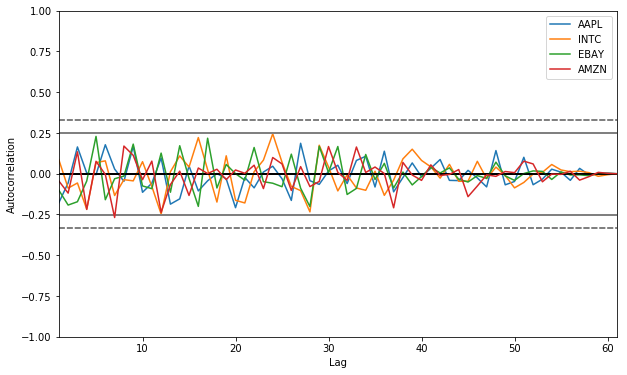

In [12]:
plt.figure(figsize=(10,6))
for i in monthReturn.columns:
    pd.plotting.autocorrelation_plot(monthReturn[i],label=i)

Based on this result, we can conclude that the month return is  a realization of a white noise process. Because all autocorrelation values are within 0.25 range. 

#### OPTIONAL: Visualize the correlation between the returns of all pairs of stocks using a scatterplot matrix (1 bonus mark)


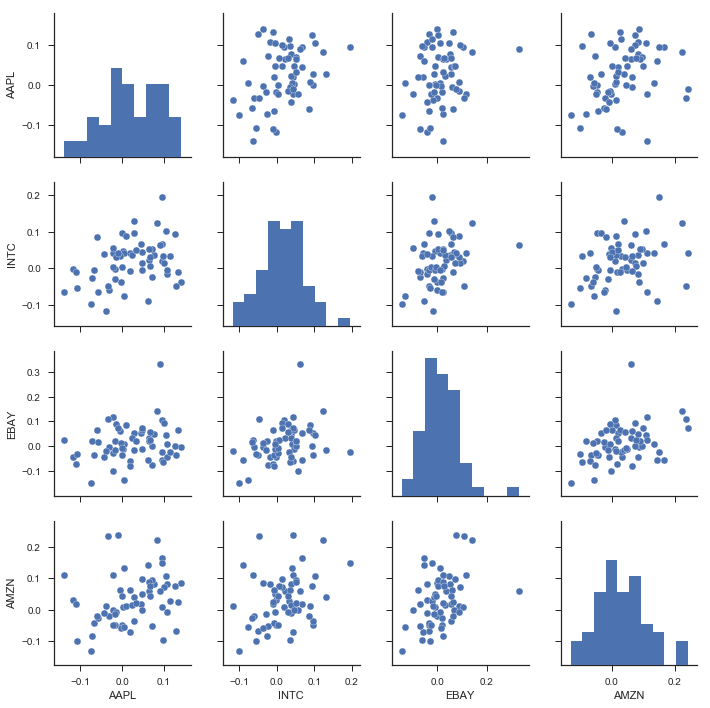

In [13]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(monthReturn)

#### OPTIONAL: Following the instructions in the article The Glowing Python (Links to an external site.)Links to an external site.  visualize the correlation of the returns of all pairs of stocks (2 bonus marks)

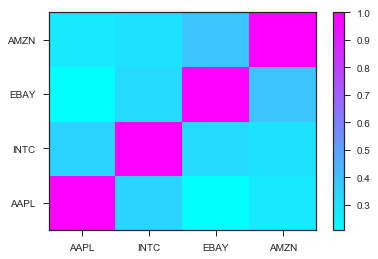

In [14]:
from numpy import corrcoef, arange
from pylab import pcolor, show, colorbar, xticks, yticks

R = corrcoef(monthReturn.T)
pcolor(R,cmap='cool')
colorbar()
yticks(arange(0.5,4.5),monthReturn.columns)
xticks(arange(0.5,4.5),monthReturn.columns)
show()